# Lecture 9: Matrix differentials, Lagrange multipliers

Based on: Geoff Gordon's  [Some examples of differentials lecture notes](https://qna.cs.cmu.edu/#/pages/view/192), [Working with differentials, part 2, notes](https://qna.cs.cmu.edu/#/pages/view/63) and  [Second and higher differentials](https://qna.cs.cmu.edu/#/pages/view/61).


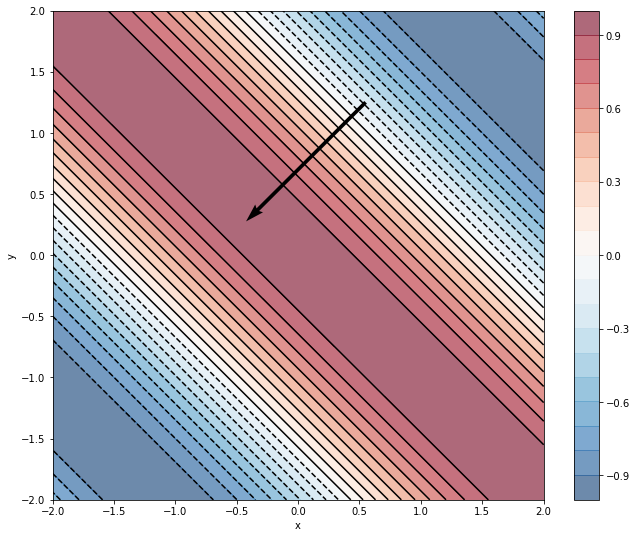

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x, y)
sigma = 1

f_XY = np.cos(X+Y)


plt.figure(figsize=(11,9))

cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',vmin=-1,vmax=1,alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
# plt.clabel(contours, inline=True, fontsize=14)
plt.xlabel('x')
plt.ylabel('y')


def draw_gradient(ax, x, y):
    grad = np.array([-np.sin(x+y),-np.sin(x+y)])
    ax.quiver(x,y,grad[0], grad[1], color='k',angles='xy', scale_units='xy', scale=1)
    
draw_gradient(plt, 0.55, 1.25)


# def first_order_taylor(x, y, dx, dy):
#     grad = np.array([-np.sin(x+y),-np.sin(x+y)])
#     return np.cos(x+y) + grad.dot(np.array([dx,dy]))
    

# print('f(0.75,1.75) is {}'.format(np.cos(0.75+1.75)))
# print('first order taylor computed at (0.25,1.25): {}'.format(first_order_taylor(0.25,1.25, 0.5,0.5)))

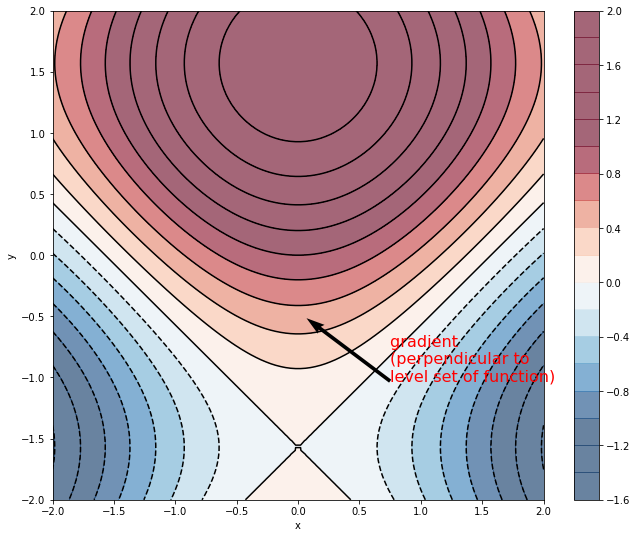

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x, y)
sigma = 1

f_XY = np.cos(X)+np.sin(Y)


plt.figure(figsize=(11,9))

cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',vmin=-1,vmax=1,alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
# plt.clabel(contours, inline=True, fontsize=14)
plt.xlabel('x')
plt.ylabel('y')


def draw_gradient(ax, x, y):
    grad = np.array([-np.sin(x),np.cos(y)])
    ax.quiver(x,y,grad[0], grad[1], color='k',angles='xy', scale_units='xy', scale=1)
    ax.text(x, y,'gradient \n(perpendicular to \nlevel set of function)',fontsize = 16,color='r')
    
draw_gradient(plt, 0.75, -1.03)


# def first_order_taylor(x, y, dx, dy):
#     grad = np.array([-np.sin(x+y),-np.sin(x+y)])
#     return np.cos(x+y) + grad.dot(np.array([dx,dy]))
    

# print('f(0.75,1.75) is {}'.format(np.cos(0.75+1.75)))
# print('first order taylor computed at (0.25,1.25): {}'.format(first_order_taylor(0.25,1.25, 0.5,0.5)))

## Derivatives with respect to a vector or matrix


Consider the differential forms with $s,t$ for scalars, $v,w$ for vectors, and $M,N$ for matrices. Then the typical forms are: 

\begin{array}{c|ccc} & \text{scalar input}&\text{vector input}&\text{matrix input}\\ \hline
\text{scalar output}& ds = a\, dt & ds = v^T\, dw & ds = \text{tr}(M^TdN) \\\text{vector output}&  dv = w\, ds & dv = M \,dw & \text(--tensor--) \\ \text{matrix output}& dM = N\, ds & \text(--tensor--) & \text(--tensor--)\end{array}

We can also write this in derivative form:


\begin{array}{c|ccc} & \text{scalar input}&\text{vector input}&\text{matrix input}\\ \hline
\text{scalar output}& \frac{ds}{dt} = a \text{ (ordinary derivative)} & \frac{ds}{dw} = v^T \text{ (gradient}^\top) & \frac{ds}{dN} = M \\\text{vector output}&  \frac{dv}{ds} = w \text{ (tangent)} & \frac{dv}{dw} = M \text{ (Jacobian)} & \text(--tensor--) \\ \text{matrix output}& \frac{dM}{ds} = N & \text(--tensor--) & \text(--tensor--)\end{array}



Here is an example. We saw that the derivative of a scalar with respect to a vector $x$ is a vector where each entry $i$ is the derivative of the scalar with respect to $x_i$.

Similarly, the derivative of a scalar with respect to a matrix $X$ is a matrix where each entry $i,j$ is the derivative of the scalar with respect to $x_{ij}$.


Let's assume $X, B \in R^{m\times n}$. Let's start with a simple function that takes $X$ as input and returns a scalar. We take the dot product between two matrices defined as the sum of their element-wise product:


$y = X\cdot B = \sum_{i=1}^m \sum_{j=1}^n x_{ij}b_{ij}$




It's then easy to see that the derivative with respect to each $x_{ij}$ is $b_{ij}$, and therefore the derivative of $y$ with respect to $X$ is the matrix where each entry $i,j$ is $b_{ij}$, i.e. the derivative is B.




Now let's apply this to another example:




$z = a^\top Xb$




We can see that 




$z = a^\top Xb = \sum_{i=1}^m \sum_{j=1}^n a_{i}x_{ij}b_{j} $




and it's clear from this that the derivative with respect to each $x_{ij}$ is $a_ib_j$. Actually, one easy way to construct this matrix is to use the outer product $a\otimes b = ab^\top$.




The derivative of $y$ with respect to $X$ is therefore $ab^\top$.




Let's see this another way:

$z = a^\top Xb$


This is a product of $a^\top$ and $Xb$. We can think of z as a $1 \times 1$ matrix, and it's easy to see that $z=tr(z)$. We now apply the trace rotation property we saw in class (the property says that if AB is square, then tr(AB)=tr(BA)):

$z=tr(z) = tr (a^\top Xb) = tr (Xb a^\top) $.


It actually turns out that given $C, D \in R^{m,n}$, the trace of $CD^\top$ is the same as the matrix dot product we defined above: $C\cdot D$.


so: $z= X\cdot (a b^\top)$ and the derivative with respect to $X$ is $a b^\top$.

### Optional: derivative of vector with respect to matrix

This will be a 3D tensor, since each item $k$ of the vector will need a term $i,j$ corresponding to the matrix entry.

Consider $v = Xu$, with $v\in \mathbb{R}^m$, $X\in \mathbb{R}^{m\times n}$ and  $u\in \mathbb{R}^n$.

Consider the derivative of $v_k$ with respect to X:


$v_k = X_{k,:}u = e_k^\top Xu$

where $e_k$ is a $m$ dimentional vector with the $k^{th}$ entry =1 and the other entries =0.

The derivative of $v_k$ with respect to $X$ is $e_kv^\top$.

The derivative of $v$ with respect to $X$ is a 3-D tensor (of size $m\times m\times n$) which we obtain by stacking the matrices $e_kv^\top$ with $k=1...m$.

We can also write it $I_{m\times m}\otimes u$.


### Neural network example 

We can write a two-layer neural network as

$$y=f(W_2g(W_1x+b_1)+b_2)$$

Here $W_1,W_2$ are weight matrices, and $b_1,b_2$ are weight vectors.

$f$ and $g$ are componentwise non-linear functions (e.g. $f_i(z_i)=ln(1+\exp(z_i))$)

We can differentiate using the chain rule and linearity: take $u1=W_1x+b_1$, and $u2=W_2g(u_1)+b_2$.

\begin{eqnarray}
dy&=&f′(u2)d(W_2g(W_1x+b_1)+b_2)\\&=&f′(u_2)W_2dg(W_1x+b_1)\\
&=&f′(u_2)W_2g′(u_1)W_1dx
\end{eqnarray}

($f′(u_2)$ and $g′(u_1)$ are  diagonal matrices (the $(i,i)$ entry of $f′(z)$ is $f′_i(z_i)$).

## Second differential

We take the differential of $df$ with respect to $x$: $d^2f$. This is a quadratic function of $dx$.

For example, if $f\in \mathbb{R}\rightarrow \mathbb{R}^n$, we have

$df=a(x)dx$
where the gradient $a(x)\in \mathbb{R}^{1\times n}$ is a row vector, and

$d^2f=dx^\top A(x)dx$
where the Hessian $A(x)\in \mathbb{R}^{n\times n}$ is a square matrix. 

### Second-order Taylor expansion 

The second order taylor approximation is:

$$\textstyle df = f'(t)\, dt + \frac{1}{2}f''(t)\, dt^2$$

or:

$$\textstyle \hat f(t) \approx f(\hat t) + f'(\hat t) (t-\hat t) + \frac{1}{2}f''(\hat t) (t-\hat t)^2\,.$$

(example in notes)

In [2]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import matplotlib.pyplot as plt

# mpl.rcParams['legend.fontsize'] = 10

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

# plt.show()


## Lagrange Multipliers

$x \in \mathbb{R}^m$, a function $f \in \mathbb{R}^m \rightarrow\mathbb{R}$ corresponding to an entity we want to optimize and $g \in \mathbb{R}^m \rightarrow\mathbb{R}$ corresponding to constraints.

Example from [Khan Academy article](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-examples)

You want to maximize the revenue $R$ of a factory, which is a function of the hours of work spent $h$ and the tons of steel used $s$: $f(h,s) = 200h^\frac{2}{3}s^\frac{1}{3}$.

You are constrained by a maximum budget $b$. Given each hour costs $20\$$ and each ton of steel costs $170\$$, and that you want to maximize the use of your budget, you have the equation: $g(h,s) = 20h+170s = b$.

You want to solve:

\begin{eqnarray}
\max_{h,s} 200h^\frac{2}{3}s^\frac{1}{3}\\
s.t. 20h+170s = b
\end{eqnarray}



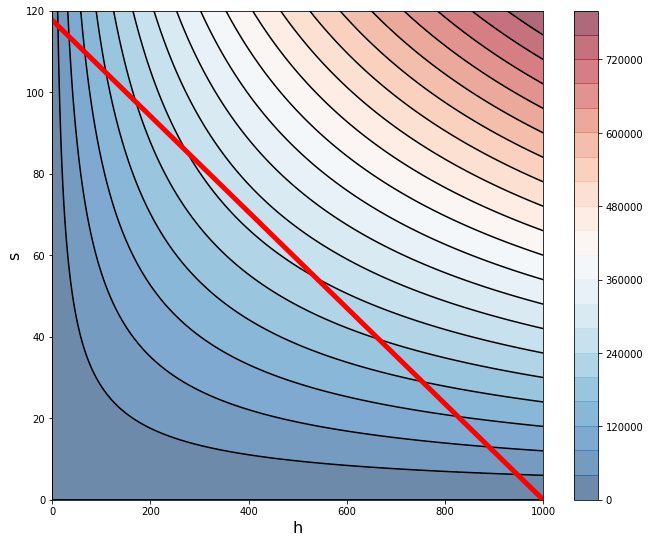

In [23]:
x = np.linspace(0,1000,1000)
y = np.linspace(0,120,1000)
X,Y = np.meshgrid(x, y)
b = 20000

f_XY = 200*X**(2/3)*Y*(1/3)

s_plot = (b - 20*x)/170

plt.figure(figsize=(11,9))

cs = plt.contourf(X, Y, f_XY,20,cmap='RdBu_r',alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
# plt.clabel(contours, inline=True, fontsize=14)
plt.xlabel('h', fontsize=16)
plt.ylabel('s', fontsize=16)
plt.plot(x,s_plot, linewidth=5,color='r')


Notice that at the optimal solution $(h^*,s^*)$, the gradients of the revenue function and the constraint function will be parallel.

Take $x=[h,r]$

We therefore can solve the system:


\begin{eqnarray}
\frac{df}{dx} = \lambda \frac{dg}{dx}\\
20h+170s = b
\end{eqnarray}

To obtain $h^*,s^*, \lambda^*$.

It turns out this is equivalent to the method of lagrange multipliers:

Given $f(x)$ and constraint $g(x) = c$:

1- Write down the lagragian: 
$$ \mathcal{L}(x,\lambda)  = f(x) - \lambda (g(x) -c)$$
2- Set gradient to zero and solve

3- Plug back in to find min/max.

In this example:

$$\mathcal{L}(x,\lambda) =200h^\frac{2}{3}s^\frac{1}{3}+ \lambda( 20h+170s - b )$$

$$\mathcal{L}(x,\lambda) = \left [\begin{array}{c}  \frac{2}{3}200h^\frac{-1}{3}s^\frac{1}{3} -20\lambda\\
\frac{1}{3}200h^\frac{2}{3}s^\frac{-2}{3} -170\lambda \\
-(20h+170s - b)\\
\end{array} \right] = \left [\begin{array}{c}  0\\
0 \\
0\\
\end{array} \right]$$ 

After solving
$$h \approx 666.667$$
$$s \approx 39.21$$
$$\lambda \approx 2.593$$

In [47]:
from sklearn import datasets

# X, y = datasets.load_diabetes(return_X_y=True)
data = datasets.load_diabetes()
X = data['data'][:,np.array([0,1])]
# y = data['target']
# from scipy.stats import zscore
# X = zscore(X)
# y = zscore(y)
y = X.dot(np.array([0.4,0.7]))+0.1*np.random.normal(size=442)



# compute error:
def mse(w_1,w_2):
    error = y-X.dot(np.array([w_1,w_2]))
    return np.sum(error**2)

print(X.shape)
print(y.shape)

(442, 2)
(442,)


/Users/lwehbe/env/py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


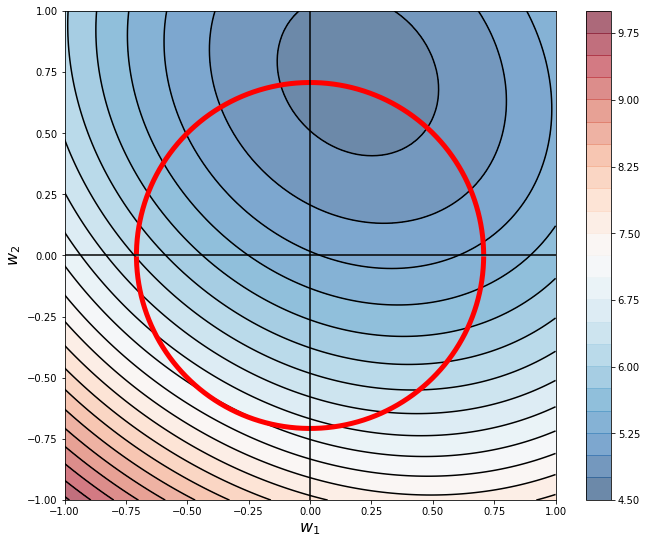

In [52]:
w1 = np.linspace(-1,1,100)
w2 = np.linspace(-1,1,100)
W1,W2 = np.meshgrid(w1, w2)
b = 0.5

f_W1W2 = np.zeros(W1.shape)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        f_W1W2[i,j] = mse(W1[i,j],W2[i,j])
    
w1 = np.linspace(-1,1,10000)
w2_plot = np.nan_to_num(np.sqrt(b - w1**2))


plt.figure(figsize=(11,9))

cs = plt.contourf(W1, W2, f_W1W2,20,cmap='RdBu_r',alpha=0.6);
plt.colorbar()
contours = plt.contour(cs, colors='k')
# plt.clabel(contours, inline=True, fontsize=14)
plt.xlabel('$w_1$', fontsize=16)
plt.ylabel('$w_2$', fontsize=16)
plt.plot(w1[w2_plot>0],w2_plot[w2_plot>0], linewidth=5,color='r')
plt.plot(w1[w2_plot>0],-w2_plot[w2_plot>0], linewidth=5,color='r')

plt.axhline(0, color='k')
plt.axvline(0, color='k')
